In [73]:
# import the data libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [74]:
#read our dataset from the file 
data = pd.read_csv('fraud_data.csv')

#get the first 10 rows from the data set
data.head(10)

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1
5,05-01-2019 03:15,"""Raynor, Reinger and Hagenes""",gas_transport,20.45,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,ef010a5f4f570d306a050a368ee2729d,64.088838,-165.104078,1
6,05-01-2019 03:21,Heller-Langosh,gas_transport,18.19,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,8e2d2fae5319d31c887dddbc70627ac4,63.917785,-165.827621,1
7,05-01-2019 11:31,Padberg-Welch,grocery_pos,367.29,Browning,MO,40.0290,-93.1607,602,Cytogeneticist,14-07-1954,5fbe827807ec9f557f6242bb48db0e51,39.167065,-93.705245,1
8,05-01-2019 18:03,McGlynn-Heathcote,misc_net,768.15,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,fba83e0a3adb530251295ab72a96b719,64.623325,-166.403973,1
9,05-01-2019 22:02,Dooley-Thompson,misc_net,849.49,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,b87c92d4824758e704da572891697fed,65.266065,-164.865352,1


In [75]:
#describe the data
data.describe()

,amt,lat,long,city_pop,merch_lat,merch_long
count,14446.000000,14446.000000,14446.000000,1.444600e+04,14446.000000,14446.000000
mean,124.430073,39.787692,-110.874225,1.065370e+05,39.787991,-110.874892
std,231.352587,5.317039,12.985813,2.902916e+05,5.360593,12.995596
min,1.000000,20.027100,-165.672300,4.600000e+01,19.032689,-166.670685
25%,12.080000,36.715400,-120.415800,4.930000e+02,36.794655,-120.146253
50%,51.520000,39.666200,-111.098500,1.645000e+03,39.620953,-111.192629
75%,101.030000,41.940400,-101.136000,3.543900e+04,42.275740,-100.446822
max,3261.470000,66.693300,-89.628700,2.383912e+06,67.510267,-88.646366


In [76]:
#drop the merchant, trans_num column for now for easier data digestion
data_drop = data.drop(columns=['merchant', 'trans_num', 'dob', 'merch_lat', 'merch_long', 'lat', 'long'])
data_drop.head(10)

,trans_date_trans_time,category,amt,city,state,city_pop,job,is_fraud
0,04-01-2019 00:58,grocery_net,14.37,Wales,AK,145,"""Administrator, education""",1
1,04-01-2019 15:06,shopping_net,966.11,Wales,AK,145,"""Administrator, education""",1
2,04-01-2019 22:37,misc_pos,49.61,Wales,AK,145,"""Administrator, education""",1
3,04-01-2019 23:06,grocery_pos,295.26,Wales,AK,145,"""Administrator, education""",1
4,04-01-2019 23:59,health_fitness,18.17,Wales,AK,145,"""Administrator, education""",1
5,05-01-2019 03:15,gas_transport,20.45,Wales,AK,145,"""Administrator, education""",1
6,05-01-2019 03:21,gas_transport,18.19,Wales,AK,145,"""Administrator, education""",1
7,05-01-2019 11:31,grocery_pos,367.29,Browning,MO,602,Cytogeneticist,1
8,05-01-2019 18:03,misc_net,768.15,Wales,AK,145,"""Administrator, education""",1
9,05-01-2019 22:02,misc_net,849.49,Wales,AK,145,"""Administrator, education""",1


In [77]:
#seeing what percentage of transactions are fraud or valid
valid = data_drop[data_drop['is_fraud'] == '0']
fraud = data_drop[data_drop['is_fraud'] == '1']

#how much of the data set is fraud
percentage_of_fraud = len(fraud) / len(data_drop)

#fraud to valid transaction ratio
fraud_valid_ratio = len(fraud) / len(valid)

print("The percentage of fraud in this dataset is", round(percentage_of_fraud, 4) * 100)
print("Number of fraud cases: ", len(fraud));
print("Number of valid transactions: ", len(valid));

The percentage of fraud in this dataset is 12.76
Number of fraud cases:  1844
Number of valid transactions:  12600


In [78]:
#what states this data set includes
print(data_drop['state'].unique())

#how many states there are
print(len(data_drop['state'].unique()))

#the unique cities are there
print(data_drop['city'].unique())

#how many cities there are
print(len(data_drop['city'].unique()))

#we see here that not all 50 states are included in this data set
#the states are located in western US

#There are 13 total states
#There are 176 unique cities

['AK' 'MO' 'NE' 'CA' 'UT' 'OR' 'WY' 'NM' 'AZ' 'WA' 'CO' 'ID' 'HI']
13
['Wales' 'Browning' 'Ravenna' 'San Jose' 'Westerville' 'Thompson'
 'Parker Dam' 'San Diego' 'Centerview' 'Vacaville' 'La Grande'
 'Port Costa' 'Meadville' 'Alva' 'Lowell' 'Albuquerque' 'Lamy' 'Hubbell'
 'Fort Washakie' 'Saint Louis' 'Kansas City' 'Arnold' 'Mesa' 'Daly City'
 'Lonetree' 'Napa' 'Kaktovik' 'Coulee Dam' 'Aurora' 'Utica' 'Roseland'
 'Newhall' 'Fields Landing' 'June Lake' 'Eugene' 'Blairsden-Graeagle'
 'Pueblo' 'Campbell' 'Moab' 'Tomales' 'Red Cliff' 'Downey' 'Smith River'
 'Riverton' 'Conway' 'Syracuse' 'Grenada' 'Jelm' 'Unionville'
 'Scotts Mills' 'Cardwell' 'Manley' 'Lagrange' 'American Fork'
 'Rock Springs' 'Tekoa' 'Independence' 'Sun City' 'Arvada' 'Williamsburg'
 'Monitor' 'Sacramento' 'Claremont' 'Hawthorne' 'Valentine' 'Matthews'
 'Helm' 'Kent' 'Glendale' 'Humboldt' 'Colorado Springs' 'Fiddletown'
 'Omaha' 'Yellowstone National Park' 'Phoenix' 'Nelson' 'Colton'
 'Moriarty' 'Parker' 'Wappapello' 'We

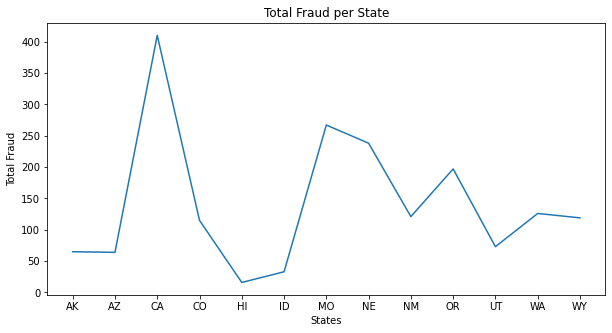

In [85]:
#How many fraudulent transactions are in each of the states provided in the dataset

#make data frame
df = pd.DataFrame(data_drop)

#cleaning our fraud data
#we found out that some of the values in the 'is_fraud' feature
#contains strings of dates
#the fraud feature itself is a string as well

#first we see what how many values are in each unique 'is_fraud'
unique = df['is_fraud'].value_counts()
# print(unique)

#drop rows were the 'is_fraud' column contains a string date
data_drop = df[df['is_fraud'].isin(['0', '1'])]

#data fraud make into integer
df['is_fraud'] = df['is_fraud'].astype(int)

#line graph of states and fraud
states = df['state'].unique()

total_fraud_per_state = df.groupby('state')['is_fraud'].sum().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(total_fraud_per_state['state'], total_fraud_per_state['is_fraud'])

plt.title('Total Fraud per State')
plt.xlabel('States')
plt.ylabel('Total Fraud')
plt.show()